<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Stuff" data-toc-modified-id="Import-Stuff-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Stuff</a></span><ul class="toc-item"><li><span><a href="#Prep-Data-for-Comparison" data-toc-modified-id="Prep-Data-for-Comparison-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prep Data for Comparison</a></span></li></ul></li><li><span><a href="#Compare-Results" data-toc-modified-id="Compare-Results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compare Results</a></span><ul class="toc-item"><li><span><a href="#Bandgap" data-toc-modified-id="Bandgap-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Bandgap</a></span></li></ul></li></ul></div>

# Import Stuff

In [14]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5)


In [2]:
valet_bs = [] #[pkl.load(open('../pickles/cp_bs_part_{}.pkl'.format(i),'rb')) for i in np.arange(46)]
for i in np.arange(46):
    pkl_file = open('../pickles/cp_bs_part_{}.pkl'.format(i),'rb')
    for j in pkl.load(pkl_file):
        valet_bs.append(j)
orig_bs = pkl.load(open('../bench_set/pickles/matproj_bench_set_clean.pkl','rb'))


## Prep Data for Comparison

In [3]:
bs_index = [i['index'] for i in valet_bs]
mp_bs = orig_bs.copy()
mp_remove = [key for key in mp_bs.keys() if key not in bs_index]

for key in mp_remove:
    del mp_bs[key]


mp_df = pd.DataFrame.from_dict(mp_bs,orient='index')
mp_df.reset_index(inplace=True)

qv_df = pd.DataFrame(valet_bs)
qv_df = qv_df[qv_df.bandgap >= 0]
qv_df.columns = ['bandgap_qv', 'bandgap_direct_qv', 'eos_errors', 'eos_fits', 'index','system', 'volume_vs_energy']


combined_df = mp_df.merge(qv_df,on='index')


# Compare Results

## Bandgap

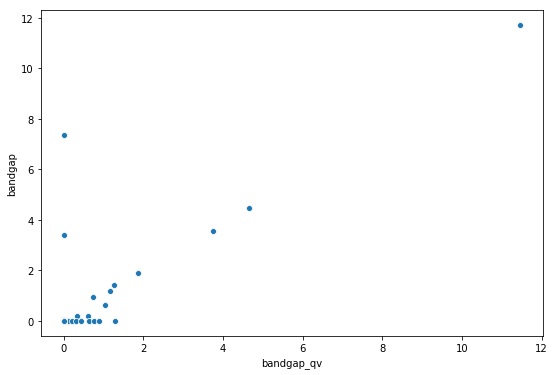

In [4]:
test = combined_df[combined_df.bandgap_qv == combined_df.bandgap_direct_qv]
fig = plt.figure(figsize=(9,6))
ax = plt.gca()

sns.scatterplot(x='bandgap_qv',y='bandgap',data=combined_df)

In [5]:
combined_df['mp_vol'] = combined_df.structure_final.apply(lambda x: x.get_volume())
combined_df['qv_vol'] = combined_df.system.apply(lambda x: x.get_volume())
combined_df.head()

,index,structure_initial,structure_final,potcar,bandgap,bandgap_qv,bandgap_direct_qv,eos_errors,eos_fits,system,volume_vs_energy,mp_vol,qv_vol
0,mp-1,"(Atom('Cs', [0.0, 0.0, 0.0], magmom=0.0, index...","(Atom('Cs', [3.0266104319773843, -3.0806802534...",{'Cs': '_sv'},0.0,0.0,0.0,None,{'pouriertarantola': {'energy': -0.85932106780...,"(Atom('Cs', [0.0, 0.0, 0.0], magmom=0.0, index...","[[104.21489730785372, 105.17985006070417, 106....",114.041336,116.111876
1,mp-1020,"(Atom('Rh', [0.0, 1.93, 1.93], magmom=0.0, ind...","(Atom('Rh', [0.0, 1.95221343, 1.95221343], mag...","{'Rh': '_pv', 'Ta': '_pv'}",0.0,0.0,0.0,None,{'pouriertarantola': {'energy': -36.3172032132...,"(Atom('Rh', [0.0, 1.952512548509679, 1.9525125...","[[51.761210399999975, 52.240480866666665, 52.7...",59.521227,59.548591
2,mp-1031,"(Atom('Cd', [0.0, 0.0, 0.0], magmom=0.0, index...","(Atom('Gd', [1.88608472, 1.88608472, 1.8860847...","{'Cd': '', 'Gd': ''}",0.0,0.0,0.0,[antonschmidt],{'pouriertarantola': {'energy': -11.8625369598...,"(Atom('Cd', [0.0, 0.0, 0.0], magmom=0.0, index...","[[47.46093749999999, 47.90039062499997, 48.339...",53.675188,58.286923
3,mp-1033,"(Atom('Be', [0.0, 0.0, 0.0], magmom=0.0, index...","(Atom('Be', [0.0, 0.0, 0.0], magmom=0.0, index...","{'Be': '_sv', 'Ni': '_pv'}",0.0,0.0,0.0,None,{'pouriertarantola': {'energy': -10.4817534621...,"(Atom('Be', [0.0, 0.0, 0.0], magmom=0.0, index...","[[16.279101562500003, 16.429833984374994, 16.5...",17.679898,17.848385
4,mp-1053,"(Atom('Zn', [1.8345, 1.8345, 1.8345], magmom=0...","(Atom('Zn', [1.843168155, 1.843168155, 1.84316...","{'Zn': '', 'Nd': '_3'}",0.0,0.0,0.0,None,"{'p3': {'energy': -6.662929801545069, 'volume'...","(Atom('Zn', [1.839922993738159, 1.839922993738...","[[44.45142057810001, 44.863007805675, 45.27459...",50.093902,49.829775


[Text(0, 0.5, 'MatProj Volume [cu. Ang]'),
 Text(0.5, 0, 'Quantum Valet Volume [cu. Ang]')]

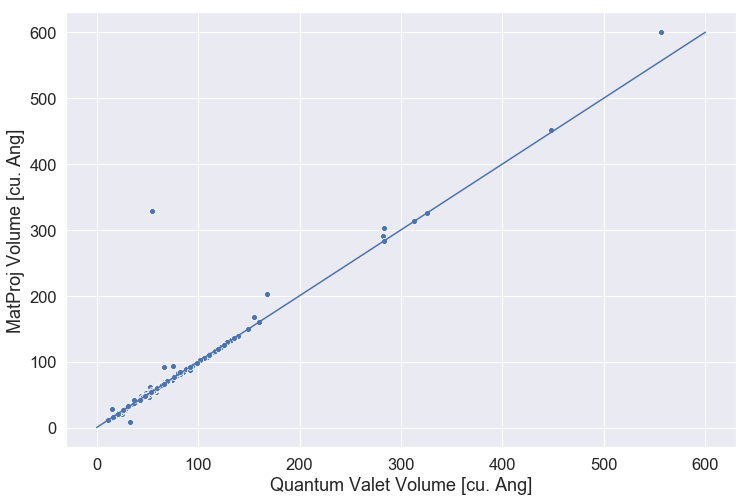

In [15]:
fig = plt.figure(figsize=(12,8))
ax = plt.gca()
x = np.linspace(0.,600,1000)
sns.scatterplot(x='qv_vol',y='mp_vol',data=combined_df,ax=ax)
ax.plot(x,x)
ax.set(xlabel='Quantum Valet Volume [cu. Ang]',ylabel='MatProj Volume [cu. Ang]')